In [11]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random
from mlxtend.plotting import category_scatter
import imageio
from sklearn.cluster import AgglomerativeClustering

Набор данных ex6data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X1 и X2 - координаты точек, которые необходимо кластеризовать.

**1. Загрузите данные ex6data1.mat из файла.**

In [12]:
data1 = scipy.io.loadmat('ex6data1.mat')
X1 = data1['X']
X1.shape

(50, 2)

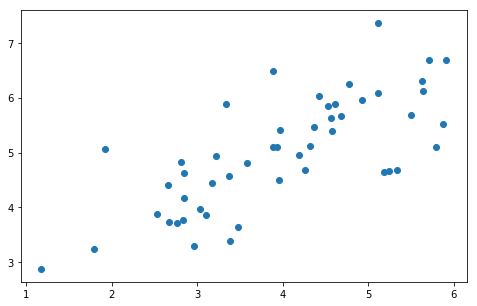

In [13]:
fig = plt.figure(figsize=(8,5))
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

**2. Реализуйте функцию случайной инициализации K центров кластеров.**

In [14]:
def rand_init_centroids(X, K):
    indexes = random.sample(range(0, len(X)), K)

    return X[indexes]

In [15]:
rand_init_centroids(X1, 3)

array([[4.52787538, 5.8541781 ],
       [1.79709714, 3.24753885],
       [4.3225147 , 5.11110472]])

**3. Реализуйте функцию определения принадлежности к кластерам.**

In [16]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum(np.square((p1 - p2))))

In [17]:
euclidean_distance(np.array([2, 1]), np.array([2, 3]))

2.0

In [57]:
def assign_clusters(X, centroids):
    m = len(X)
    
    c = np.zeros([m, 1]).astype(int)
    
    for x_i in range(m):
        x = X[x_i]
        x_distance = 100000 # инициализируем большим занчением
        
        for c_i in range(len(centroids)):
            centroid = centroids[c_i]
            dist = euclidean_distance(x, centroid)
            
            if dist < x_distance:
                x_distance = dist
                c[x_i] = int(c_i)
    
    return c

In [60]:
c = assign_clusters(X1, rand_init_centroids(X1, 2))
c.shape

(50, 1)

**4. Реализуйте функцию пересчета центров кластеров.**

In [20]:
def split_data_by_clusters(X, clusters):
    m = len(X)
    cluster_indexes = np.unique(clusters)
    
    cluster_values = []
    
    for c_index in cluster_indexes:
        # получаем все значения для центроида c_index
        values = np.array([X[i] for i in range(m) if clusters[i] == c_index]) 
        cluster_values.append(values)
    
    
    
    return cluster_values

In [21]:
def move_centroids(X, clusters):
    cluster_valaues = split_data_by_clusters(X, clusters)
    return np.array([np.mean(c_vals, axis=0) for c_vals in cluster_valaues])

In [22]:
move_centroids(X1, c)

array([[3.14506134, 4.35696128],
       [5.06370667, 5.82478985]])

**5. Реализуйте алгоритм K-средних.**

In [23]:
def k_means(X, K, max_iter = 10):
    centroids = rand_init_centroids(X, K)
    centroids_history = [centroids]
    clusters = np.zeros([len(X), 1])

    for i in range(max_iter):
        clusters = assign_clusters(X, centroids)
        centroids = move_centroids(X, clusters)
        centroids_history.append(centroids)
    
    return centroids, clusters, np.array(centroids_history)

In [24]:
def k_mean_cost(X, clusters, centroids):
    m = len(clusters)
    
    sum = 0
    for i in range(len(X)):
        sum += euclidean_distance(X[i], centroids[int(clusters[i])])
    
    return sum / m

In [25]:
def best_k_means(X, K, max_iter = 10, tries = 100):
    best_cost = 1000000
    best_centr = None
    best_cluster = None
    best_centr_hist = None
    best_iteration = 0
    
    for i in range(tries):
        centr, clust, centr_hist = k_means(X, K, max_iter)
        cost = k_mean_cost(X, clust, centr)
        if cost < best_cost:
            best_cost = cost
            best_centr = centr
            best_cluster = clust
            best_centr_hist = centr_hist
            best_iteration = i
    
    print(f'Лучший результат: {best_cost} был достигнут на {best_iteration} итерации.')
    
    return best_centr, best_cluster, best_centr_hist

**6. Постройте график, на котором данные разделены на K=3 кластеров (при помощи различных маркеров или цветов), а также траекторию движения центров кластеров в процессе работы алгоритма**

In [26]:
centr, clust, centr_hist = best_k_means(X1, 3, 20)
X1_mod = np.hstack([X1, clust])

Лучший результат: 0.6685613604551582 был достигнут на 3 итерации.


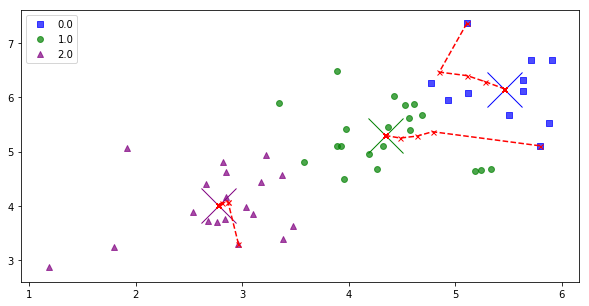

In [27]:
colors = ['blue', 'green','purple', 'gray', 'cyan']
fig = category_scatter(x=0, y=1, label_col=2, data=X1_mod, markersize=35, colors=colors, markers='so^v')
fig.set_size_inches(10, 5)

for i in range(len(centr)):
    cntrid = centr[i]
    plt.plot(cntrid[0], cntrid[1], 'x', markersize=35, c=colors[i])
    plt.plot(centr_hist[:,i,0], centr_hist[:,i,1], 'rx--', markersize=5)

Набор данных bird_small.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит массив размером (16384, 3) - изображение 128x128 в формате RGB.

**7. Загрузите данные bird_small.mat из файла.**

In [28]:
bird_data = scipy.io.loadmat('bird_small.mat')
Xb = bird_data['A']
Xb.shape

(128, 128, 3)

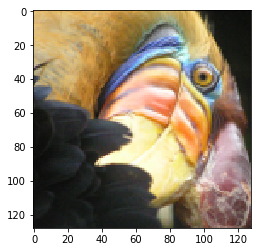

In [29]:
plt.imshow(Xb)

**8. С помощью алгоритма K-средних используйте 16 цветов для кодирования пикселей.**

In [30]:
bird_k = 16

In [91]:
bird_centr, bird_clust, _ = best_k_means(Xb.reshape(-1, 3), bird_k, 20, 10)

Лучший результат: 18.974480362826778 был достигнут на 0 итерации.


**9. Насколько уменьшился размер изображения? Как это сказалось на качестве?**

In [90]:
xb_size = Xb.size
compressed_size = bird_centr.size + bird_clust.size
size_diff = compressed_size / xb_size

print(f'Размер исходного изображения = {Xb.shape[0]} x {Xb.shape[1]} x {Xb.shape[2]} = {xb_size}')
print(f'Размер сжатого изображения = {bird_centr.shape[0]} x {bird_centr.shape[1]} + {bird_clust.shape[0]} = {compressed_size}')
print(f'Разница = {size_diff:f}')



Размер исходного изображения = 128 x 128 x 3 = 49152
Размер сжатого изображения = 16 x 3 + 16384 = 16432
Разница = 0.334310


In [95]:
def reconstruct_image(clusters, centroids):
    pixels_count = clusters.shape[0]
    image = np.zeros([pixels_count, centroids.shape[1]]).astype(int)
    
    for i in range(pixels_count):
        image[i] = centroids[int(clusters[i])]
    
    return image

In [96]:
restored_bird_img = reconstruct_image(bird_clust, bird_centr).reshape(128, 128, 3)

In [97]:
restored_bird_img.shape

(128, 128, 3)

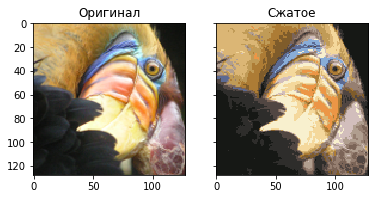

In [99]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('Оригинал')
ax1.imshow(Xb)
ax2.set_title('Сжатое')
ax2.imshow(restored_bird_img)

In [100]:
img2 = imageio.imread('225-128x128.jpg')

In [101]:
img2.shape

(128, 128, 3)

In [102]:
img2_centroids, img2_clusters, _ = best_k_means(img2.reshape(-1, 3), bird_k, 5, 5)

Лучший результат: 17.053475541028327 был достигнут на 0 итерации.


In [103]:
restored_img2 = reconstruct_image(img2_clusters, img2_centroids).reshape(128, 128, 3)

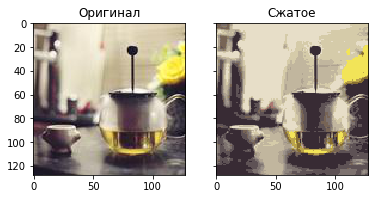

In [104]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('Оригинал')
ax1.imshow(img2)
ax2.set_title('Сжатое')
ax2.imshow(restored_img2)

**11. Реализуйте алгоритм иерархической кластеризации на том же изображении. Сравните полученные результаты.**

In [109]:
cluster = AgglomerativeClustering(n_clusters=bird_k)
cluster.fit_predict(img2.reshape(-1, 3))

array([15, 15, 15, ...,  5,  1, 11])

In [110]:
img2_2_clusters = cluster.labels_
img2_2_centroids = move_centroids(img2.reshape(-1, 3), img2_2_clusters)

In [111]:
restored_img3 = reconstruct_image(img2_2_clusters, img2_2_centroids).reshape(128, 128, 3)

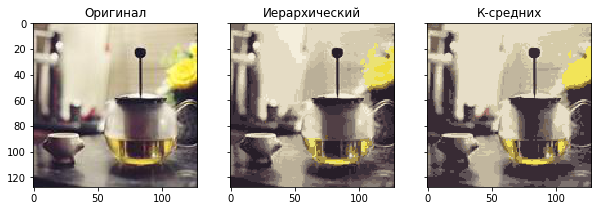

In [117]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_size_inches(10, 9)
ax1.set_title('Оригинал')
ax1.imshow(img2)
ax2.set_title('Иерархический')
ax2.imshow(restored_img3)
ax3.set_title('К-средних')
ax3.imshow(restored_img2)